In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [34]:
specimens = []
models = []
amounts = []
nodes = []
ws = []
ms = []
imgsizes = []
with open("sharc/logs.dat", 'r') as f:
    for line in f.readlines():
        if "Job" in line:
            l = line.split('(')
            q = l[1].split(')')[0]
            if "et3" in q:
                specimen = "et3"
                imsize = 10
            elif "et1" in q:
                specimen = "et1"
                imsize = 100
            elif "et4" in q:
                specimen = "et4"
                imsize = 1000
            specimens.append(specimen)
            imgsizes.append(imsize)
                
            et = q.split(specimen)[1]
            
            if "ep" in et:
                model = "ep"
            else:
                model = "e"
            models.append(model)
            
            am = et.split(model)[1]
            
            if am[0] == "-":
                amount = float(am[:4])
            else:
                amount = float(am[:3])
            amounts.append(amount)
            
            node = int(am.split('-')[-1])
            nodes.append(node)
            
#             print(node, amount, model, specimen)

        elif "Wallclock" in line:
            w = line.split('=')[1].split(':')
            H = int(w[0])*60*60
            M = int(w[1])*60
            S = int(w[2])+M+H
            ws.append(S)
        elif "Max vmem" in line:
            m = float(line.split('=')[1][:-2])
            ms.append(m)

h = ["Model", "Displacement", "WallclockTime", "MaxVmem", "Processes", "ImgSize"]
L = []
for i in range(len(models)):
    L.append([models[i], amounts[i], ws[i], ms[i], nodes[i], imgsizes[i]])
    
df = pd.DataFrame(L, columns=h)

df["Speedup"] = pd.Series(0.0, index=df.index)

for imsize in set(imgsizes):
    for d in set(amounts):
        for m in set(models):
            wct = df.loc[df["Displacement"] == d].loc[df["Processes"] == 4].loc[df["Model"] == m].loc[df["ImgSize"] == imsize].WallclockTime.values

            ff = df.loc[df["Displacement"] == d].loc[df["Model"] == m].loc[df["ImgSize"] == imsize]
            for i, r in ff.iterrows():
                try:
                    df.loc[i, "Speedup"] = wct/r.WallclockTime
                except:
                    continue

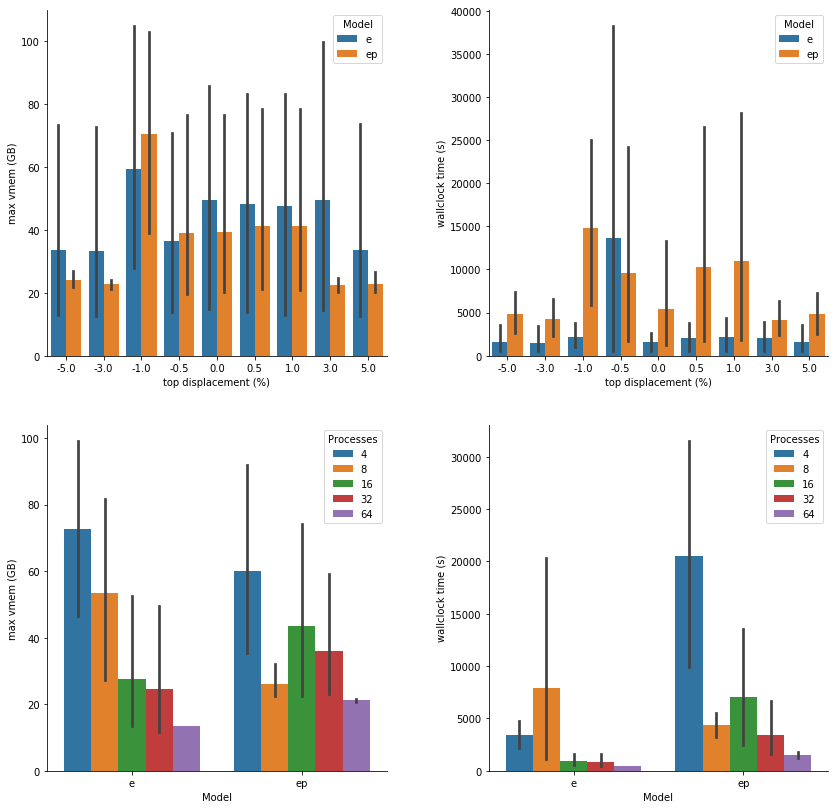

In [35]:
f = plt.figure(1, figsize=(14,14))
grid = plt.GridSpec(2, 2, wspace=0.3)
ax1 = plt.subplot(grid[0,0])
ax2 = plt.subplot(grid[0,1])
ax3 = plt.subplot(grid[1,0])
ax4 = plt.subplot(grid[1,1])
# ax2.set(yscale="log")

sns.barplot(data=df, x="Displacement", y="MaxVmem", hue="Model", ax= ax1)
sns.barplot(data=df, x="Displacement", y="WallclockTime", hue="Model", ax= ax2)
    
sns.barplot(data=df, x="Model", y="MaxVmem", hue="Processes", ax=ax3)
sns.barplot(data=df, x="Model", y="WallclockTime", hue="Processes", ax=ax4)

for  ax in [ax1, ax3]:
    ax.set_ylabel("max vmem (GB)")
for ax in [ax2, ax4]:
    ax.set_ylabel("wallclock time (s)")
for ax in [ax1, ax2]:
    ax.set_xlabel("top displacement (%)")

sns.despine()

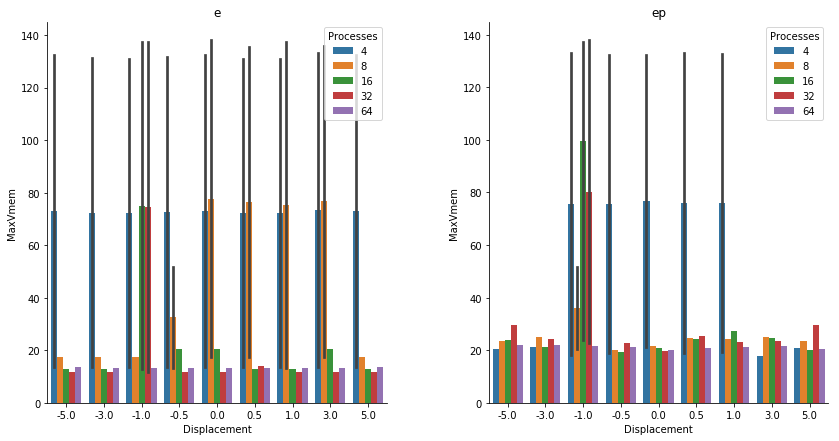

In [36]:
f = plt.figure(1, figsize=(14,7))
grid = plt.GridSpec(1, 2, wspace=0.3)
ax1 = plt.subplot(grid[0,0])
ax2 = plt.subplot(grid[0,1])
# ax2.set(yscale="log")

sns.barplot(data=df.loc[df["Model"] == 'e'], x="Displacement", y="MaxVmem", hue="Processes", ax= ax1)
ax1.set_title("e")

sns.barplot(data=df.loc[df["Model"] == 'ep'], x="Displacement", y="MaxVmem", hue="Processes", ax= ax2)
ax2.set_title("ep")

sns.despine()

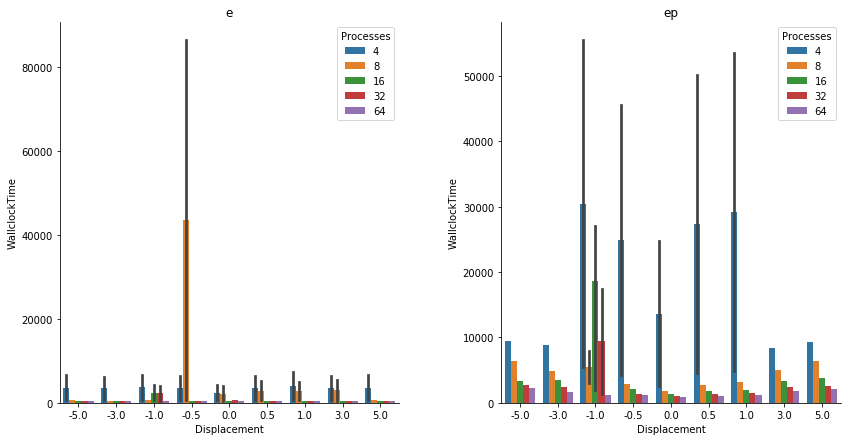

In [37]:
f = plt.figure(1, figsize=(14,7))
grid = plt.GridSpec(1, 2, wspace=0.3)
ax1 = plt.subplot(grid[0,0])
ax2 = plt.subplot(grid[0,1])
# ax2.set(yscale="log")

sns.barplot(data=df.loc[df["Model"] == 'e'], x="Displacement", y="WallclockTime", hue="Processes", ax= ax1)
ax1.set_title("e")

sns.barplot(data=df.loc[df["Model"] == 'ep'], x="Displacement", y="WallclockTime", hue="Processes", ax= ax2)
ax2.set_title("ep")

sns.despine()

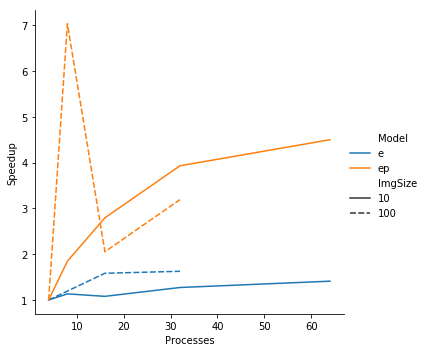

In [38]:
sns.relplot(data=df.loc[df["Displacement"] == -1], x="Processes", y="Speedup", kind="line", style="ImgSize", hue="Model")